<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Travel_Message_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 300/300 [00:02<00:00, 142.59it/s]



🧾 BoW + KNN – Classification Report:
              precision    recall  f1-score   support

     Booking       1.00      1.00      1.00        25
   Complaint       1.00      1.00      1.00        25
    Question       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



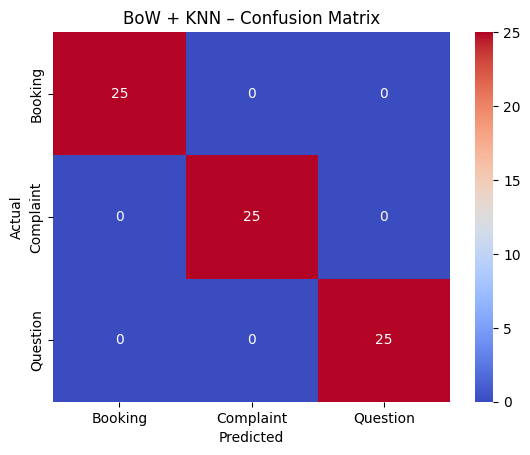


🧾 TF-IDF + KNN – Classification Report:
              precision    recall  f1-score   support

     Booking       1.00      1.00      1.00        25
   Complaint       1.00      1.00      1.00        25
    Question       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



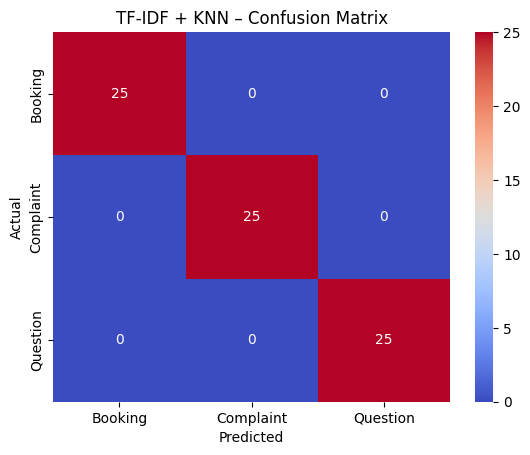


🧾 Embeddings + KNN – Classification Report:
              precision    recall  f1-score   support

     Booking       1.00      1.00      1.00        25
   Complaint       1.00      1.00      1.00        25
    Question       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



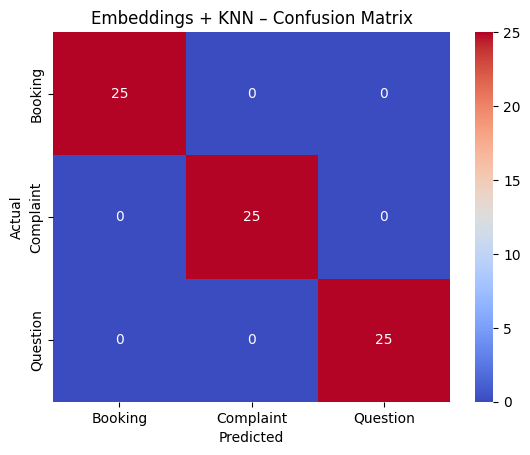

In [6]:
# ✈️ Classify travel-related user messages with KNN
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 Load medium-sized spaCy model
nlp = spacy.load("en_core_web_md")

# 🧹 Tokenizer using spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [tok.lemma_.lower().strip() for tok in doc if not tok.is_stop and not tok.is_punct]

# 🧾 Generate synthetic travel messages
booking = [
    "I'd like to book a flight to Paris.", "Can I reserve a hotel in Tokyo?",
    "Please help me schedule my trip to Rome.", "I want to book tickets for next week.",
    "Is there availability for a double room in Lisbon?"
]
complaint = [
    "My flight was delayed by 8 hours.", "The hotel room was dirty and cold.",
    "I never received my booking confirmation.", "Customer service was unhelpful.",
    "I was charged twice for my trip."
]
question = [
    "What’s the baggage limit for economy class?", "Do I need a visa to travel to Canada?",
    "Are meals included on international flights?", "What’s the refund policy?",
    "Can I change my destination after booking?"
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(booking))
    data["label"].append(0)  # Booking
    data["message"].append(random.choice(complaint))
    data["label"].append(1)  # Complaint
    data["message"].append(random.choice(question))
    data["label"].append(2)  # Question

df_travel = pd.DataFrame(data)

# 🔠 Vectorization
bow_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
X_bow = bow_vectorizer.fit_transform(df_travel["message"])
X_tfidf = tfidf_vectorizer.fit_transform(df_travel["message"])
X_embed = np.array([nlp(text).vector for text in tqdm(df_travel["message"])])

# 🤖 Evaluation function
def evaluate_travel_msgs(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🧾 {title} – Classification Report:")
    print(classification_report(y_test, preds, target_names=["Booking", "Complaint", "Question"]))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Booking", "Complaint", "Question"], yticklabels=["Booking", "Complaint", "Question"])
    plt.title(f"{title} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🚀 Evaluate KNN on all 3 feature types
evaluate_travel_msgs(X_bow, df_travel["label"], "BoW + KNN")
evaluate_travel_msgs(X_tfidf, df_travel["label"], "TF-IDF + KNN")
evaluate_travel_msgs(X_embed, df_travel["label"], "Embeddings + KNN")
